## **Conclusion**


1. The EDA revealed that the churn rate is \~17%, and it is consistent between iPhone users and Android users.

2. In addition to EDA revealing that users who drive very long distances on their driving days are **more likely to churn**, but users who drive more often are **less likely to churn**. 
The reason for this tendency is an opportunity for further investigation, and it would be something else to ask the data team about.

3. And the days between `driving_days` and `activity_days` need to be noticed

## **Exploring and Analyzing Data**

In [336]:
# Import packages
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    print("Import successfully")
except:
    print("Import fail")

Import successfully


In [295]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

In [296]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [297]:
df.size

194987

In [298]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


### **Checking each column in dataset**

#### `sessions` 
 _The number of occurences of a user opening the app during the month_

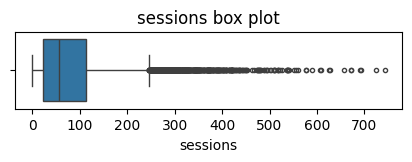

In [300]:
# Box plot
# Create function for later use
def boxplotter(input_data, input_column, **kwargs):
    plt.figure(figsize = (5, 1))
    sns.boxplot(data = input_data, x = input_column, fliersize = 3)
    plt.title(f'{input_column} box plot')

boxplotter(df, "sessions")


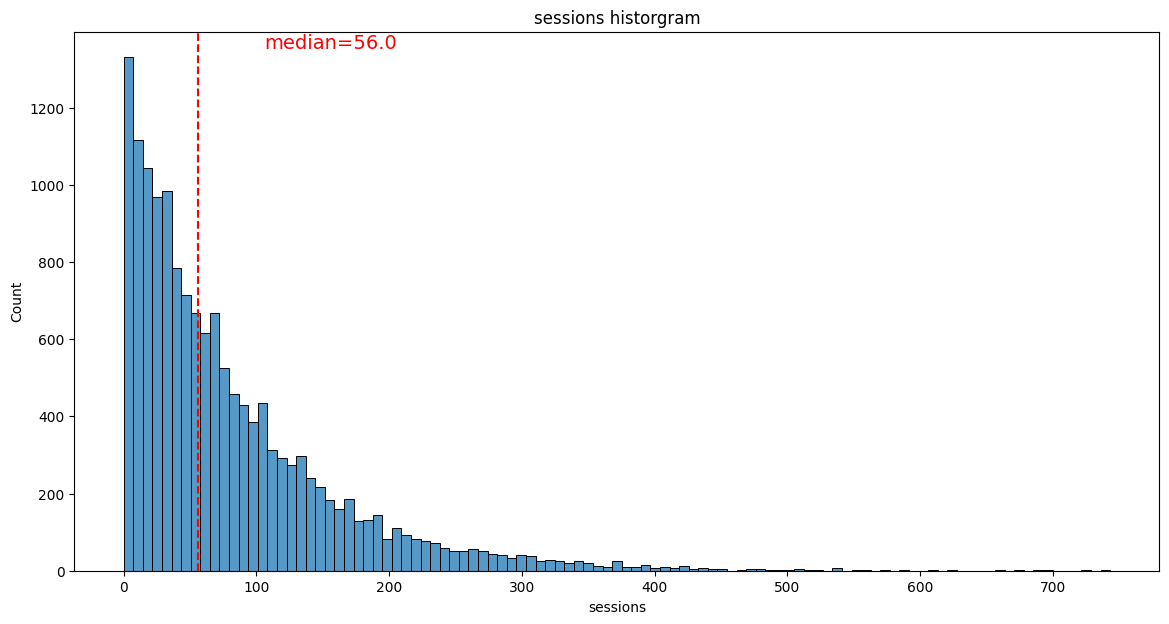

In [301]:
# Histogram
# Create function for later use
def histogrammer(input_data, input_column, **kwargs):
    median = round(df[input_column].median(), 1)
    maximum = round(df[input_column].max(), 1)
    plt.figure(figsize = (14, 7))
    ax = sns.histplot(data = input_data,
                 x = input_column,
                 **kwargs)
    plt.axvline(median, color = "red", linestyle = "--")
    ax.text((median/maximum)+0.1, 0.97,f"median={median}", color = "red", fontsize = 14, transform = ax.transAxes)
    plt.title(f"{input_column} historgram")

histogrammer(df, "sessions")

#### `drives`
_An occurrence of driving at least 1 km during the month_

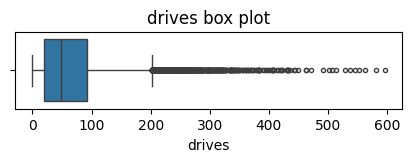

In [302]:
# Box plot

boxplotter(df, "drives")


596


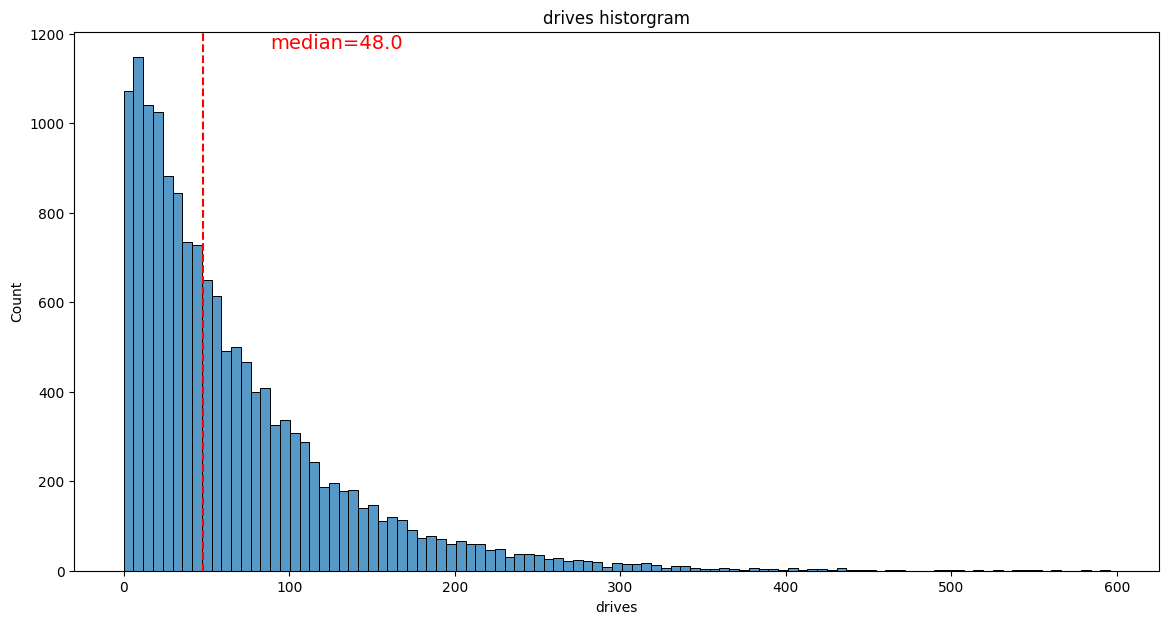

In [303]:
# Histogram
histogrammer(df, "drives")
print(df['drives'].max())



#### `total_sessions`
_A model estimate of the total number of sessions since a user has onboarded_

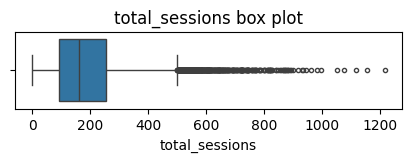

In [304]:
# Box plot
boxplotter(df, "total_sessions")


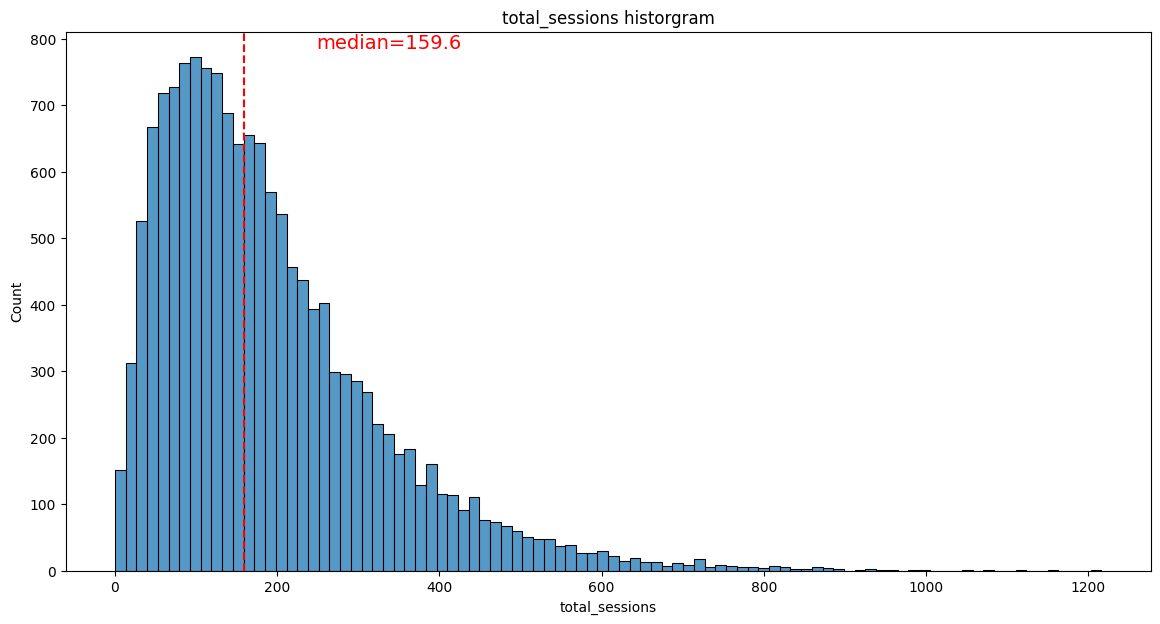

In [305]:
# Histogram
histogrammer(df, "total_sessions")

#### `n_days_after_onboarding`
_The number of days since a user signed up for the app_

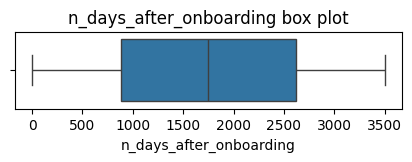

In [306]:
# Box plot
boxplotter(df, "n_days_after_onboarding")

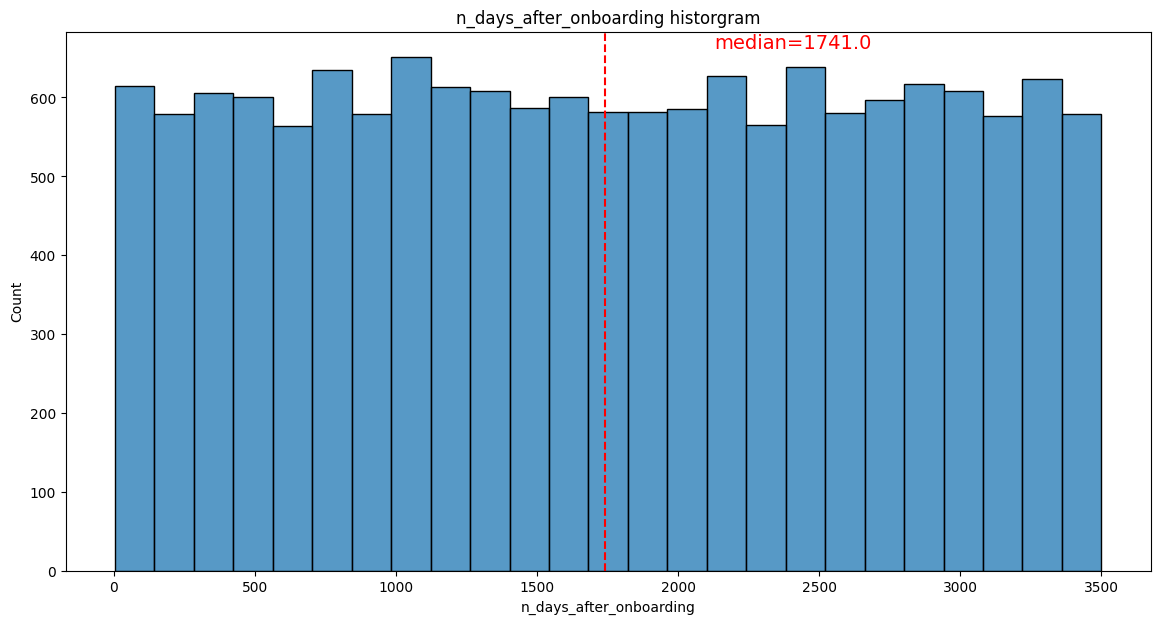

In [307]:
# Histogram
histogrammer(df, "n_days_after_onboarding")

#### `driven_km_drives`
_Total kilometers driven during the month_

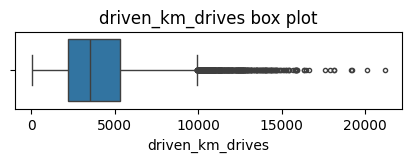

In [308]:
# Box plot
boxplotter(df, "driven_km_drives")

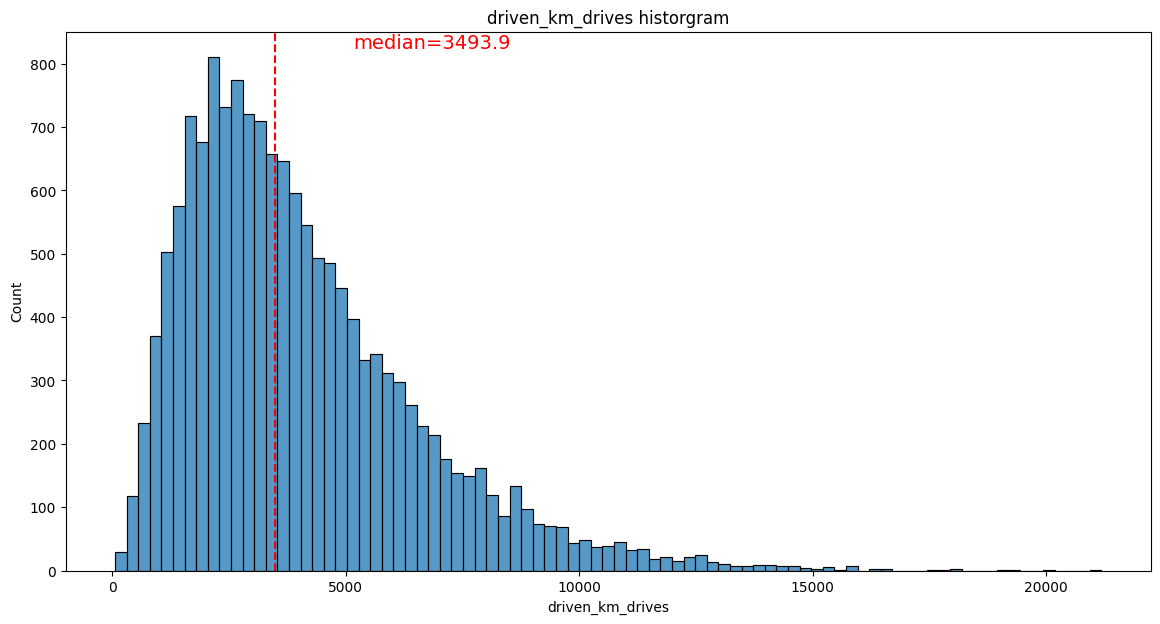

In [309]:
# Histogram
histogrammer(df, "driven_km_drives")

#### `duration_minutes_drives`
_Total duration driven in minutes during the month_

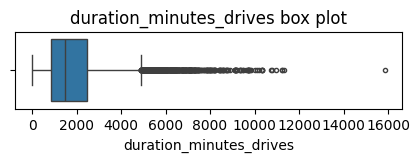

In [310]:
# Box plot
boxplotter(df, "duration_minutes_drives")

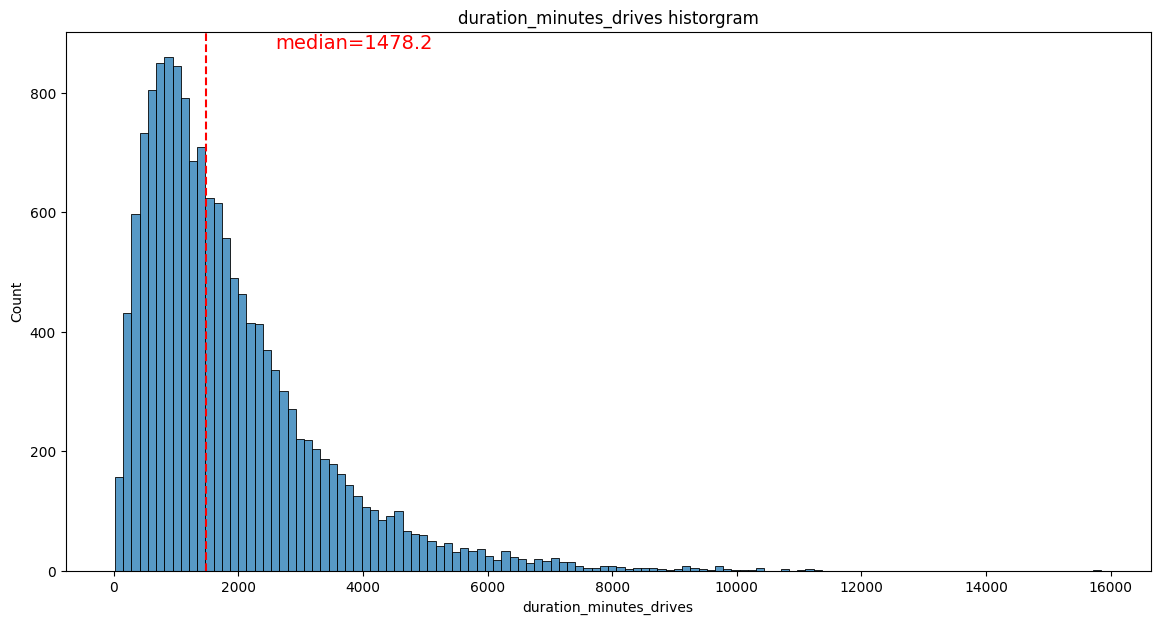

In [311]:
# Histogram
histogrammer(df, "duration_minutes_drives")

#### `activity_days`
_Number of days the user opens the app during the month_

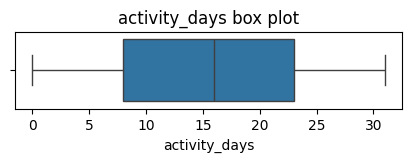

In [312]:
# Box plot
boxplotter(df, "activity_days")

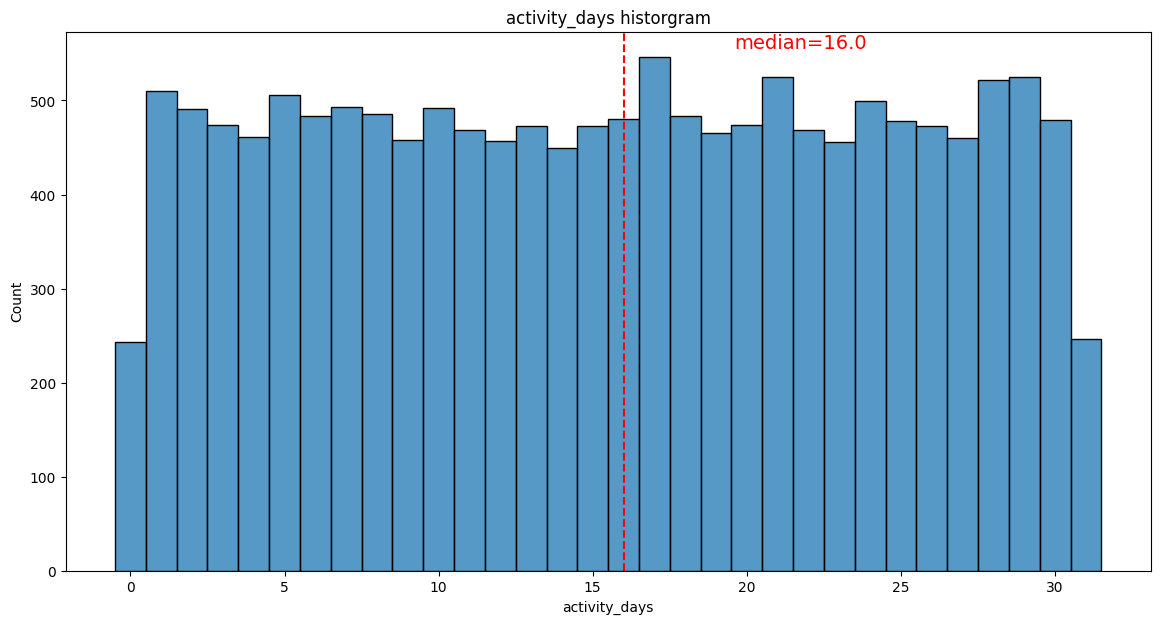

In [313]:
# Histogram
histogrammer(df, "activity_days", discrete = True)

#### `driving_days`
_Number of days the user drives (at least 1 km) during the month_

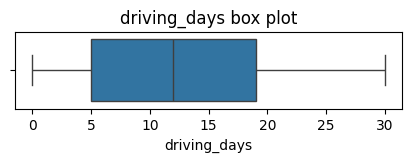

In [314]:
# Box plot
boxplotter(df, "driving_days")

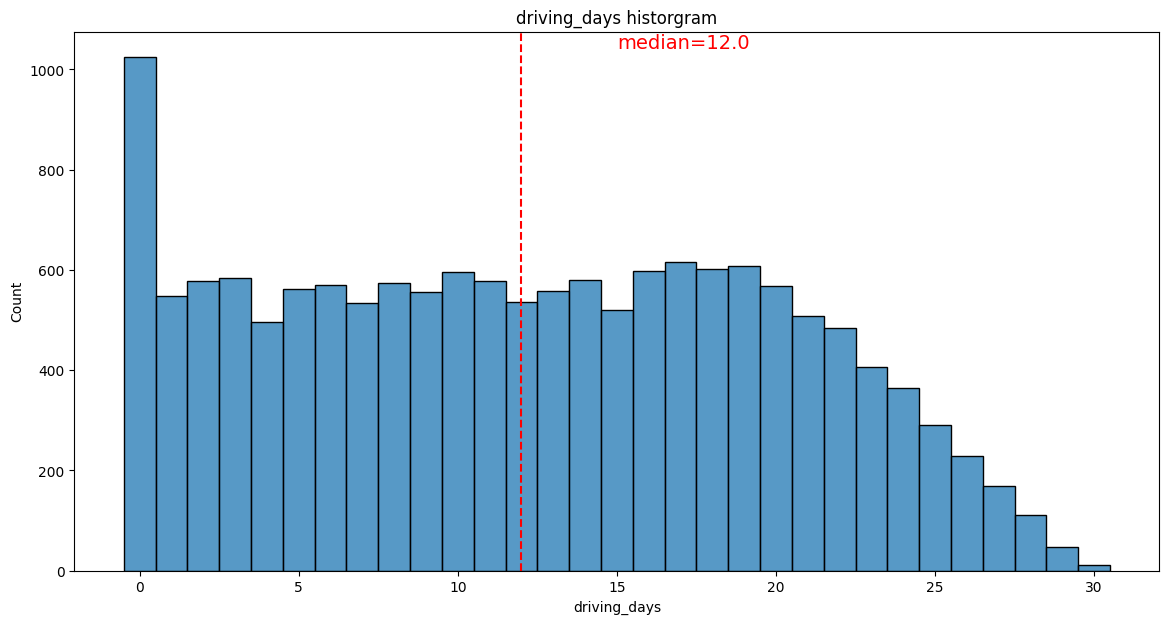

In [315]:
# Histogram
histogrammer(df, "driving_days", discrete = True)

#### **Checking the ratio of each device user : iPhone and Android**

Text(0.5, 1.0, 'User by device')

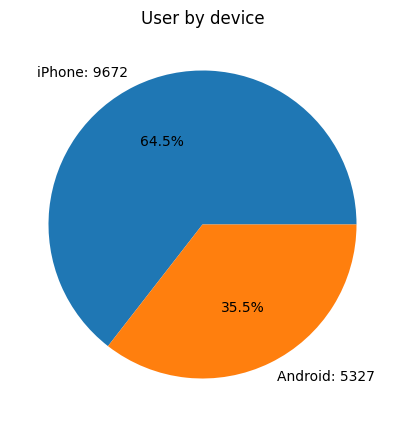

In [316]:
# Pie chart
plt.figure(figsize = (5, 5))
data = df["device"].value_counts()
plt.pie(data,
        labels = [f"{data.index[0]}: {data.values[0]}", 
                  f"{data.index[1]}: {data.values[1]}"],
                  autopct = "%1.1f%%")
plt.title("User by device")

#### **Checking the ratio of each label**

Text(0.5, 1.0, 'Count of retained vs. churned')

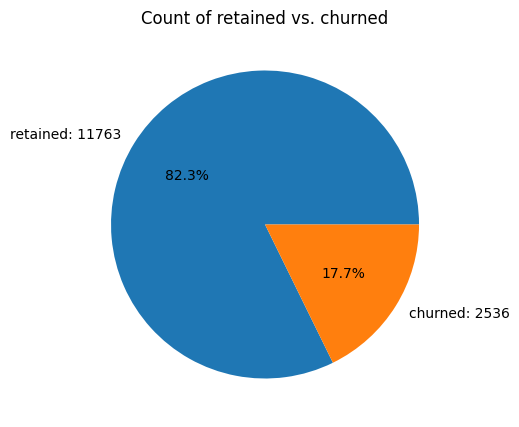

In [317]:
# Pie chart
plt.figure(figsize = (5, 5))
data = df['label'].value_counts()
plt.pie(data,
        labels = [f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct = '%1.1f%%'
        )
plt.title('Count of retained vs. churned')

#### **Comparing `driving_days` and `activity_days`**

Text(0.5, 1.0, 'driving_days vs. activity_days')

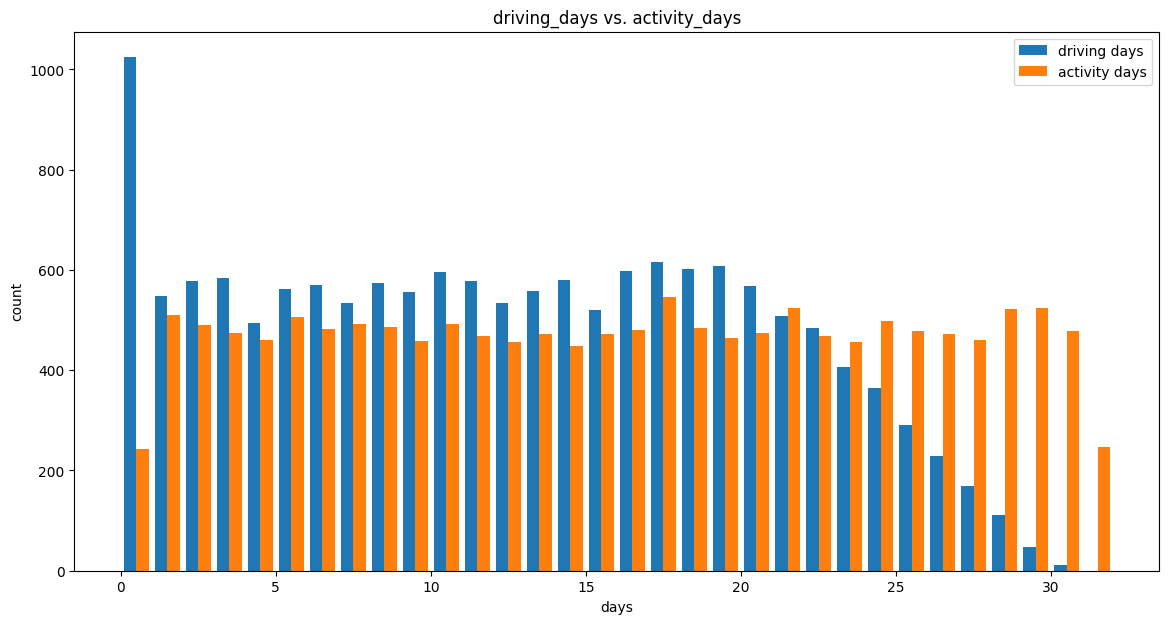

In [318]:
# Histogram
plt.figure(figsize = (14, 7))
plt.hist([df['driving_days'], df['activity_days']],
         bins = range(0,33),
         label = ["driving days", "activity days"])
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days')


In [319]:
print("driving days : ", df["driving_days"].max())
print("activity days : ", df["activity_days"].max())

driving days :  30
activity days :  31


The numbers of the days are different between `driving_days` and `activity_days`

Text(0.5, 1.0, 'driving_days v.s. activity_days')

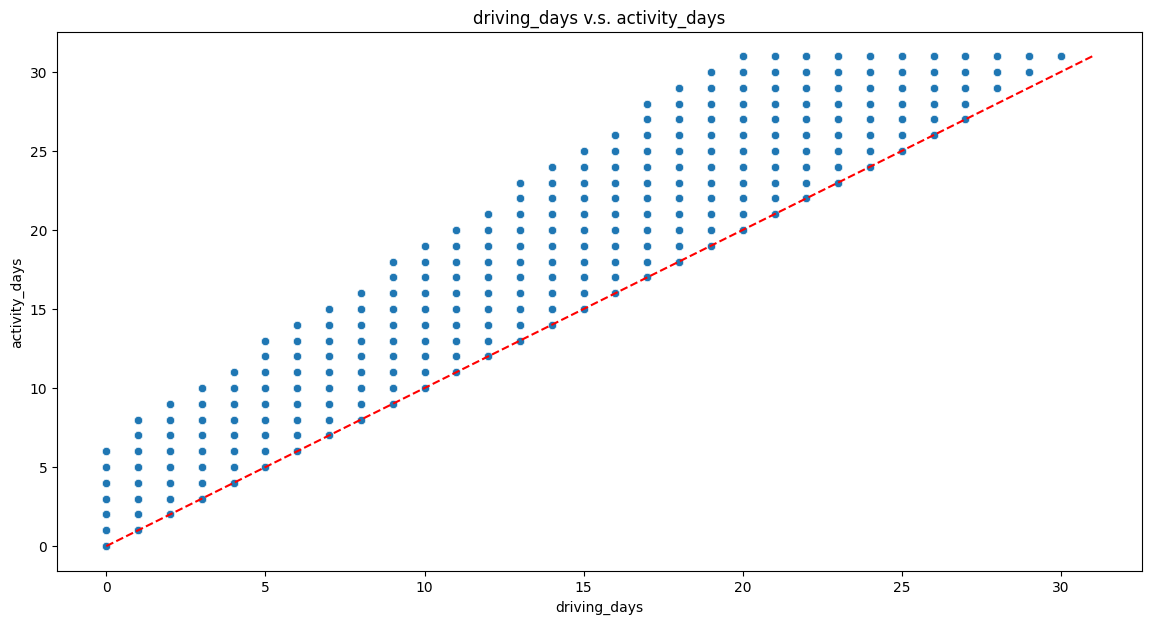

In [320]:
# Scatter plot
plt.figure(figsize = (14, 7))
sns.scatterplot(df, x = "driving_days", y = "activity_days")
plt.plot([0, 31], [0, 31], color = "red", linestyle = "--")
plt.title("driving_days v.s. activity_days")


#### **Retention by device**

Text(0.5, 1.0, 'Retention by device histogram')

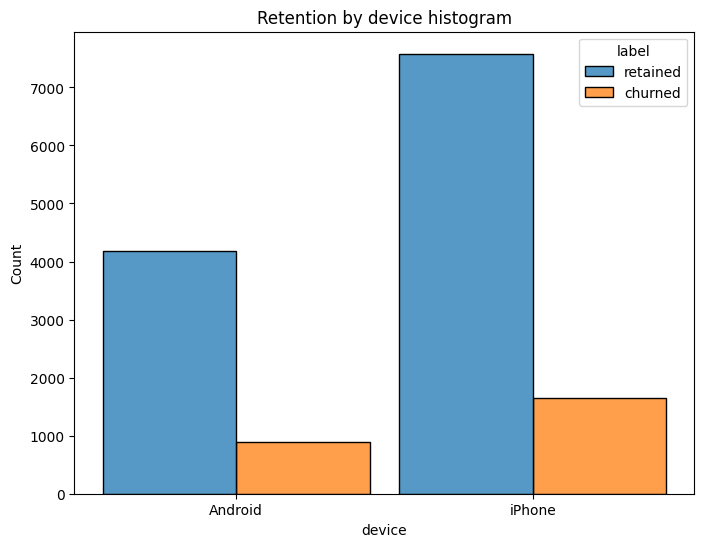

In [321]:
# Histogram
plt.figure(figsize = (8, 6))
sns.histplot(data = df, x ="device", hue = "label", multiple = "dodge", shrink = 0.9)
plt.title("Retention by device histogram")

#### **Creating `km_per_driving_day` to check the retention**


In [322]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [323]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0


# 2. Confirm that it worked
df['km_per_driving_day'].describe()


count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **Churn rate**

Text(0.5, 1.0, 'Churn rate by mean km_per_drinving_day')

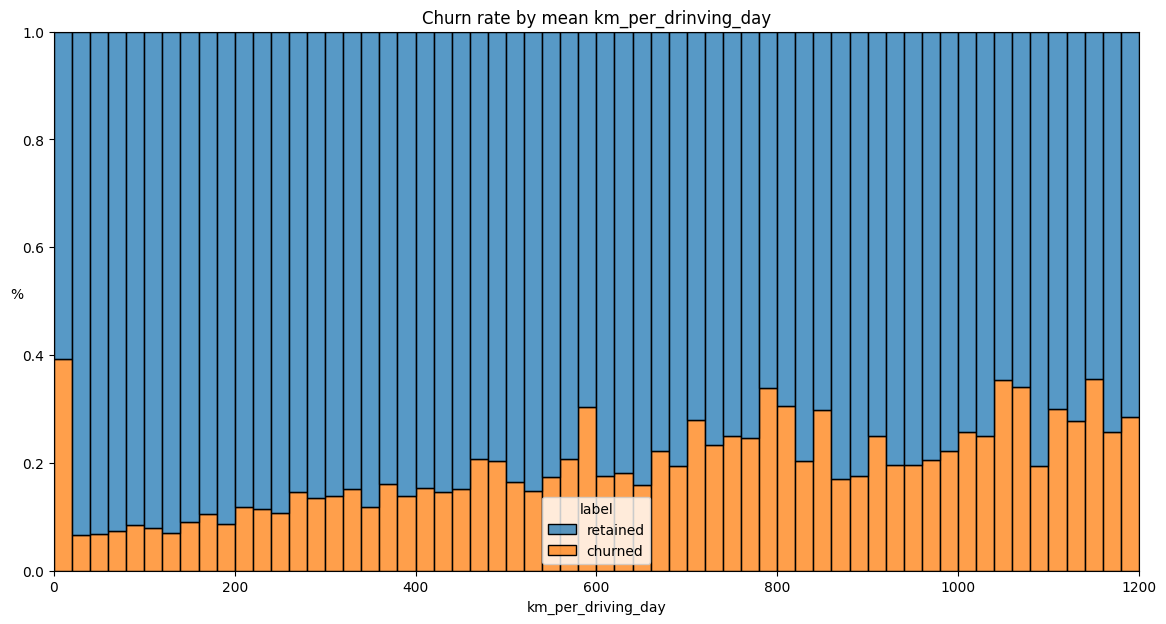

In [324]:
# Histogram
plt.figure(figsize = (14, 7))
sns.histplot(data = df, 
             x = "km_per_driving_day",
             bins = range(0, 1201, 20),
             hue = 'label',
             multiple = "fill" )
plt.ylabel("%", rotation = 0)
plt.title("Churn rate by mean km_per_drinving_day")

Text(0.5, 1.0, 'Churn rate per drinving day')

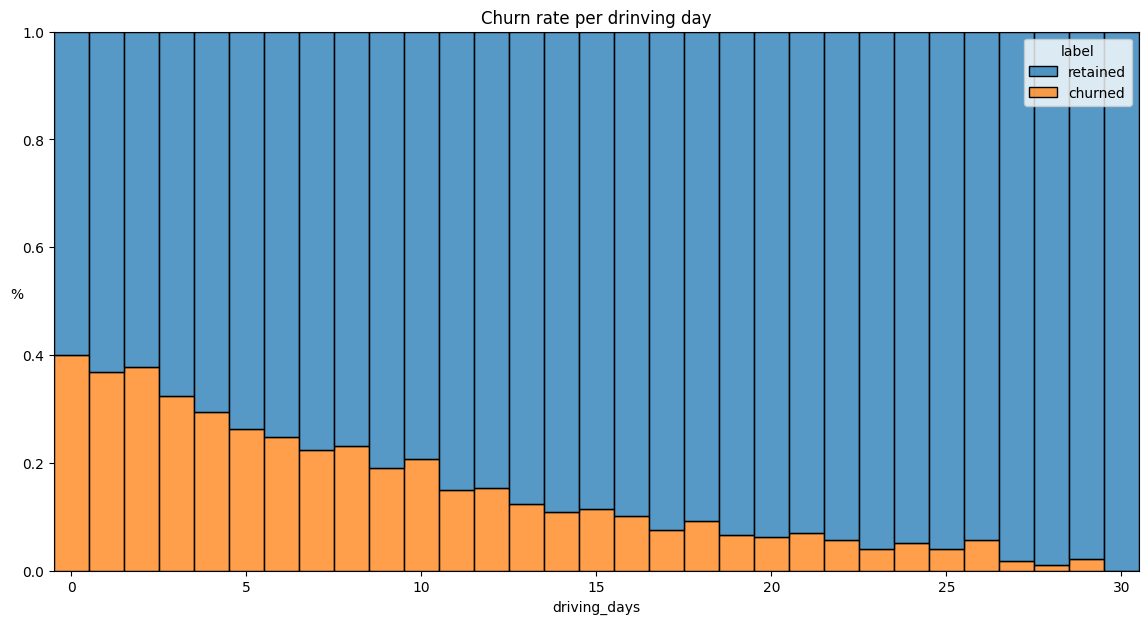

In [325]:
# Histogram
plt.figure(figsize = (14, 7))
sns.histplot(data = df, 
             x = "driving_days",
             bins = range(1, 32),
             hue = 'label',
              multiple = "fill",
              discrete = True)
plt.ylabel("%", rotation = 0)
plt.title("Churn rate per drinving day")

#### **Creating `percent_seeeions_in_last_month` to check the retention**

In [326]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

In [327]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

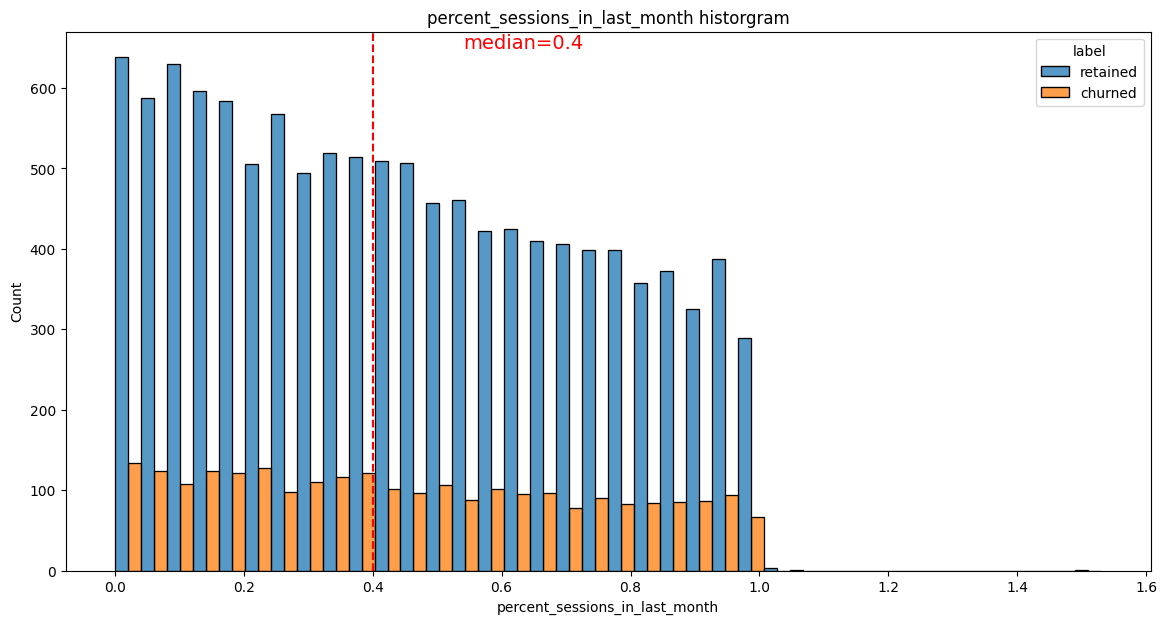

In [328]:
# Histogram
histogrammer(df, 
             'percent_sessions_in_last_month',
             hue = df['label'],
             multiple = 'dodge')

In [329]:
df['n_days_after_onboarding'].median()

1741.0

#### **Num. days after onboarding for use with >=40% sessions in last month**

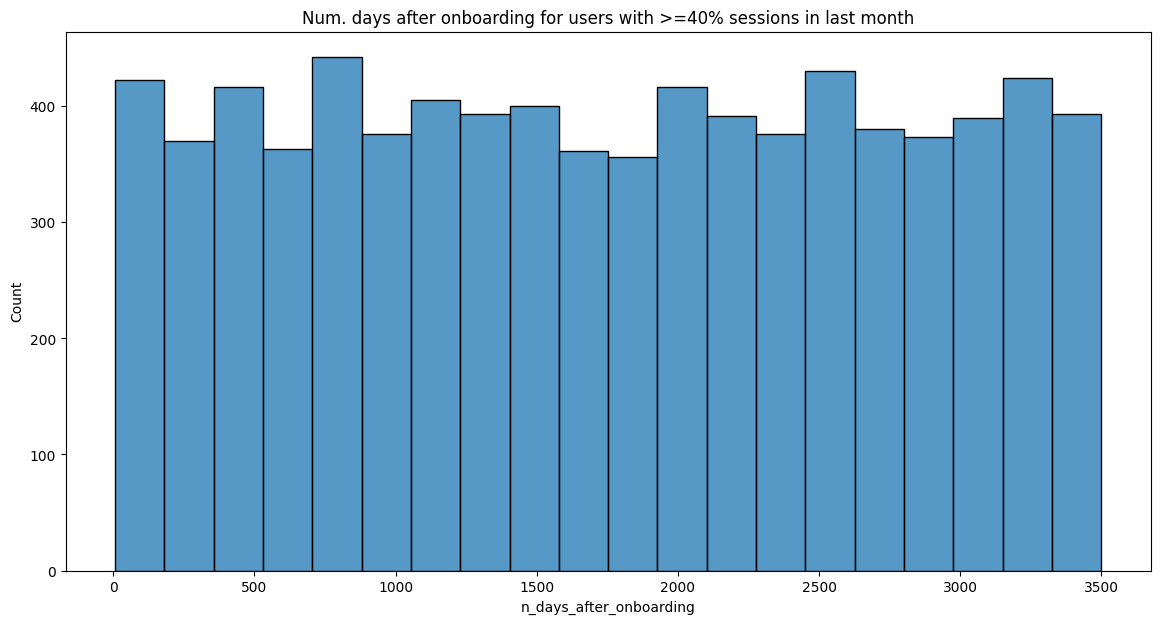

In [330]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month'] >= 0.4]
plt.figure(figsize=(14, 7))
sns.histplot(x = data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

#### **Handling the outliers**

In [331]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [332]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [333]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


In [334]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [335]:
df.head(10)


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,0.343134,0.809524
